# Exponential Regression for Investment Portfolio Growth


## Overview
This project explores the use of exponential regression to model and project the growth of the **BSE Sensex index**. The Sensex, being a composite indicator of major Indian companies, acts as a proxy for an investment portfolio. By transforming the data using logarithms and applying regression techniques, we estimate long-term growth trends and evaluate the predictive power of such models.  

Our solution leverages both **exponential curve fitting** and **log-linear regression** to capture portfolio growth patterns and test their accuracy on unseen future data.

$$
y = a \cdot e^{b x}
$$

to synthetic real portfolio growth data using **gradient descent**. We will:

1. Import BSE Sensex dataset from online sources*
2. Save it as a CSV file.
3. Transform the model using logarithms to obtain a linear form.
4. Implement linear regression using gradient descent by using sklearn's LinearRegression library.
5. Estimate $a$ and $b$ from the fitted parameters.
6. Visualize the fit and compute error metrics like **MSE**.

*https://www.kaggle.com/datasets/gauravduttakiit/sp-bse-sensex?resource=download and https://www.bseindia.com/indices/IndexArchiveData.html

## FinTech Applications
In practice, exponential regression models such as this can support **financial technology (FinTech)** platforms in:  

- **Investment Forecasting**: Estimating long-term growth of stock portfolios or indices.  
- **Savings Projections**: Helping individuals project retirement or savings account balances.  
- **Risk Management**: Identifying deviations from exponential growth as early warning signals. 

By validating against future Sensex data, the model demonstrates how historical patterns can guide **forward-looking financial decisions**.


## Methodology
We model the Sensex closing value with an exponential growth function:

$$
y = a \cdot e^{b t}
$$

where:  
- y= closing price,  
- t = time (days since start of dataset),  
- a, b = model parameters.  

Taking logarithms linearizes the model:

$$
ln(y) = ln(a) + b t
$$

This enables a **log-linear regression** on \((t, \ln(y))\). **linear regression** (`sklearn.LinearRegression`) are used.  

The cost function minimized is **Mean Squared Error (MSE)**:

$$
J(c, m) = \frac{1}{2n} \sum_{i=1}^n \big[ (c + m x_i) - y_i' \big]^2
$$

where $$ y_i' = ln(y_i) $$

## Multilingual Data Handling

When working with multilingual datasets, several challenges and strategies arise:

- **Challenges**  
  - Different scripts and writing systems (e.g., Latin, Devanagari, Arabic).  
  - Tokenization and word segmentation (especially for languages without spaces, like Chinese or Japanese).  
  - Encoding issues (UTF-8 is standard, but legacy datasets may vary).  
  - Handling stopwords, morphology, and grammar variations across languages.  

- **Techniques**  
  - Use of **Unicode normalization** (e.g., NFC, NFD).  
  - **Language detection** (libraries like `langdetect`, `langid`).  
  - **Multilingual embeddings** (e.g., `mBERT`, `XLM-R`).  
  - **Machine Translation (MT)** as preprocessing for low-resource languages.  
  - **Tokenization tools** such as `IndicNLP`, `jieba` (Chinese), or Hugging Face’s `tokenizers`.  

- **Best Practices**  
  - Always standardize encoding to UTF-8.  
  - Preprocess text per language-specific rules.  
  - Consider transfer learning from high-resource to low-resource languages.  
  - Evaluate performance separately across languages to avoid bias.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
from scipy.stats import norm

In [2]:

# Load historical dataset (1991–2021)
historical_data = pd.read_csv("dataset.csv")

# Ensure proper datetime format
historical_data['Date'] = pd.to_datetime(historical_data['Date'], format='%d-%b-%y')

# Extract closing prices
closing_prices_hist = historical_data['Close'].values
dates_hist = historical_data['Date']

# Convert dates to numeric index (time variable)
time_hist = np.arange(len(closing_prices_hist))

## Log transformation

The exponential model:

$$
y = a \cdot e^{b x}
$$

can be linearized by taking the natural logarithm:

$$
\ln y = \ln a + b x
$$

Let:
- $c = \ln a$ (intercept)
- $m = b$ (slope)

Then:
$$
\ln y = c + m x
$$

We will perform **linear regression** on $(x, \ln y)$ using **gradient descent**.


In [3]:
# Transform closing values with log
log_closing_prices = np.log(closing_prices_hist)
# Reshape time for sklearn
time_hist_reshaped = time_hist.reshape(-1, 1)

## Linear regression using gradient descent

We want to minimize the Mean Squared Error (MSE) cost function:

$$
J(c, m) = \frac{1}{2n} \sum_{i=1}^n \left[ (c + m x_i) - y_i' \right]^2
$$

where $y_i' = \ln y_i$.

The gradients are:

$$
\frac{\partial J}{\partial c} = \frac{1}{n} \sum_{i=1}^n \left[ (c + m x_i) - y_i' \right]
$$

$$
\frac{\partial J}{\partial m} = \frac{1}{n} \sum_{i=1}^n \left[ (c + m x_i) - y_i' \right] x_i
$$

Gradient descent updates:

$$
c := c - \alpha \frac{\partial J}{\partial c}, \quad m := m - \alpha \frac{\partial J}{\partial m}
$$


In [4]:
# Fit linear regression
log_lin_reg = LinearRegression()
log_lin_reg.fit(time_hist_reshaped, log_closing_prices)

# Predictions in log scale
log_pred_hist = log_lin_reg.predict(time_hist_reshaped)

# Convert back to exponential scale
predicted_hist_loglin = np.exp(log_pred_hist)

print(f"Log-Linear Regression Coefficients: Intercept = {log_lin_reg.intercept_:.4f}, Slope = {log_lin_reg.coef_[0]:.8f}")

Log-Linear Regression Coefficients: Intercept = 7.4972, Slope = 0.00044390


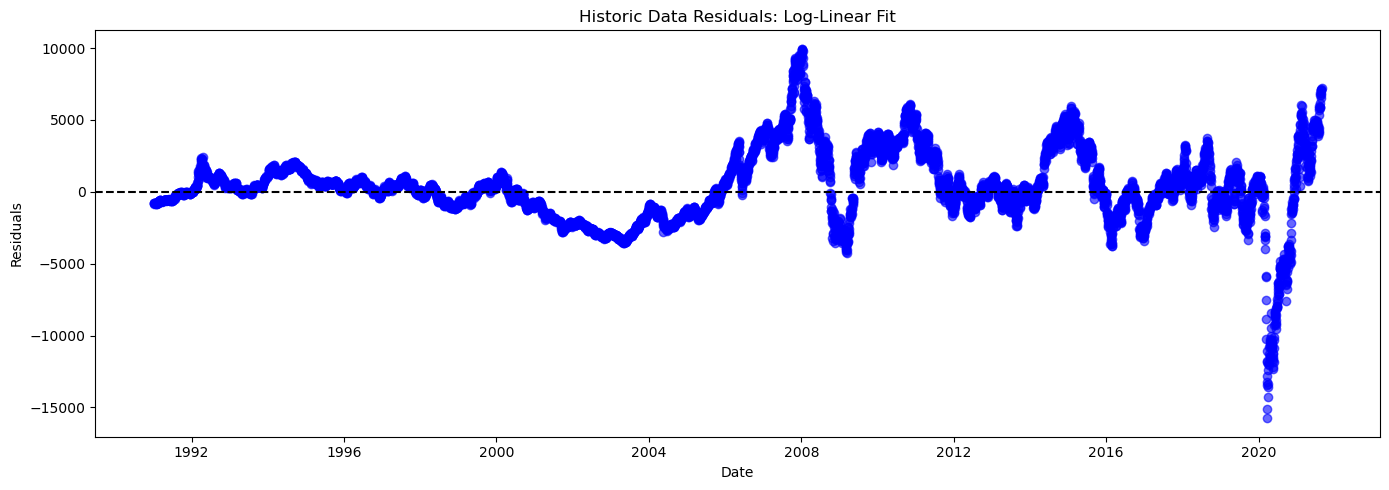

In [5]:
residuals_loglin = closing_prices_hist - predicted_hist_loglin

plt.figure(figsize=(14,5))

plt.subplot(1,1,1)
plt.scatter(dates_hist, residuals_loglin, alpha=0.6, color="blue")
plt.axhline(y=0, color="black", linestyle="--")
plt.title("Historic Data Residuals: Log-Linear Fit")
plt.xlabel("Date"); plt.ylabel("Residuals")

plt.tight_layout()
plt.show()


Carrying out the same procedure for the test data that is data from 2021-25.

In [6]:
future_data = pd.read_csv("test_set.csv")
future_data['Date'] = pd.to_datetime(future_data['Date'], format='%d-%B-%Y')

closing_prices_future = future_data['Close'].values
dates_future = future_data['Date']

# Extend time index
time_future = np.arange(len(closing_prices_hist), len(closing_prices_hist) + len(closing_prices_future))
time_future_reshaped = time_future.reshape(-1,1)

# Predictions on future data
predicted_future_loglin = np.exp(log_lin_reg.predict(time_future_reshaped))

## Visualisation

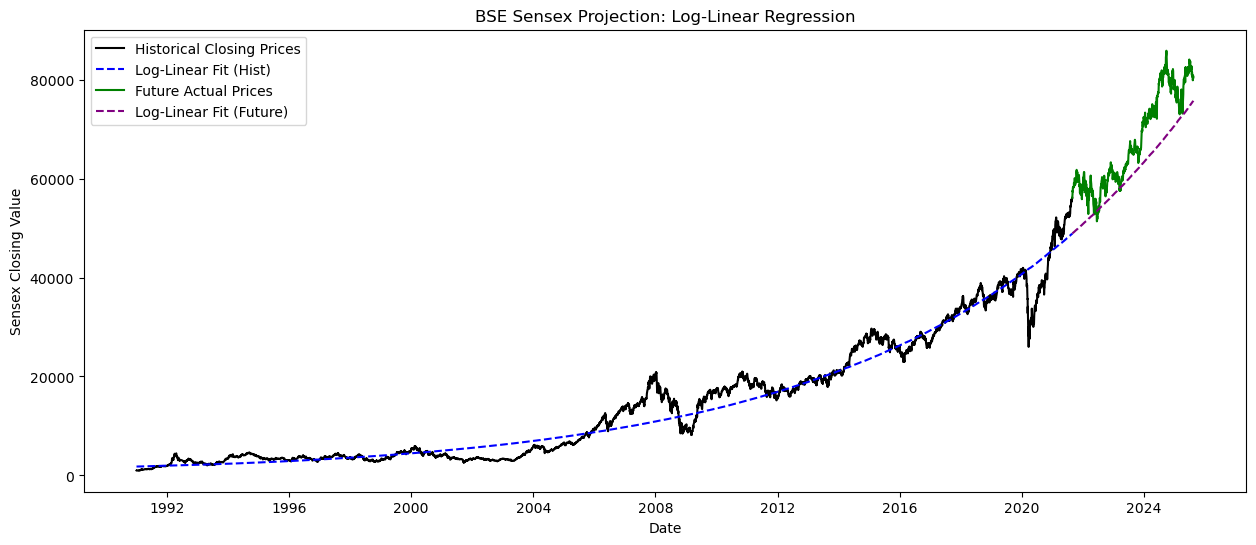

In [7]:
plt.figure(figsize=(15,6))
plt.plot(dates_hist, closing_prices_hist, label="Historical Closing Prices", color="black")
plt.plot(dates_hist, predicted_hist_loglin, label="Log-Linear Fit (Hist)", linestyle="--", color="blue")

plt.plot(dates_future, closing_prices_future, label="Future Actual Prices", color="green")
plt.plot(dates_future, predicted_future_loglin, label="Log-Linear Fit (Future)", linestyle="--", color="purple")

plt.title("BSE Sensex Projection: Log-Linear Regression")
plt.xlabel("Date"); plt.ylabel("Sensex Closing Value")
plt.legend()
plt.show()

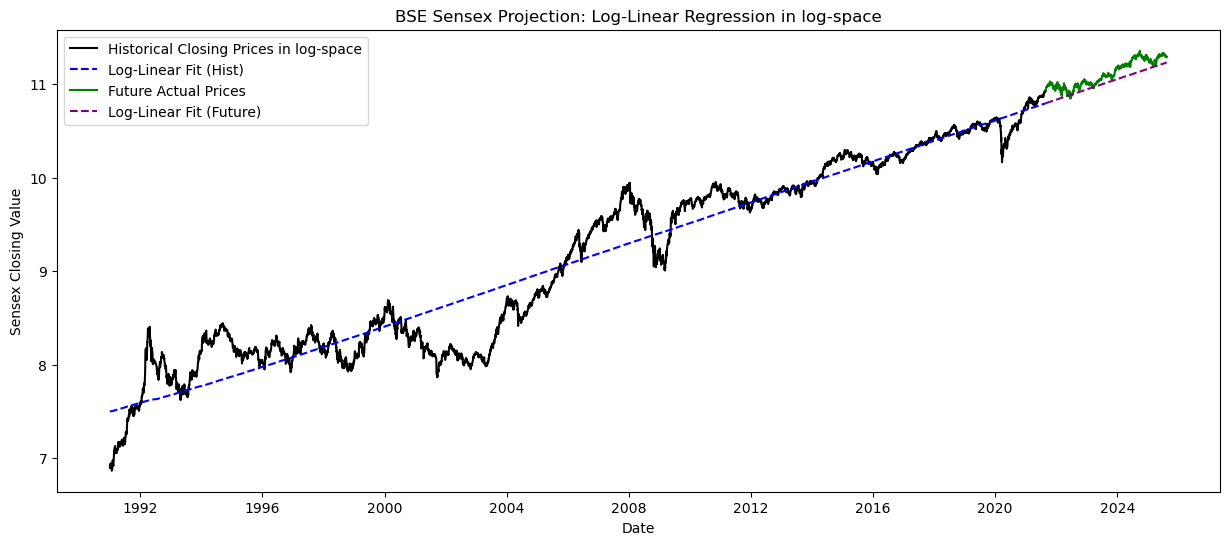

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(dates_hist, np.log(closing_prices_hist), label="Historical Closing Prices in log-space", color="black")
plt.plot(dates_hist, np.log(predicted_hist_loglin), label="Log-Linear Fit (Hist)", linestyle="--", color="blue")

plt.plot(dates_future, np.log(closing_prices_future), label="Future Actual Prices", color="green")
plt.plot(dates_future, np.log(predicted_future_loglin), label="Log-Linear Fit (Future)", linestyle="--", color="purple")

plt.title("BSE Sensex Projection: Log-Linear Regression in log-space")
plt.xlabel("Date"); plt.ylabel("Sensex Closing Value")
plt.legend()
plt.show()

## Evaluation Metrics
The model performance is assessed using:  

- **Mean Squared Error (MSE)**: Captures average squared prediction error.     
- **Yearly Error Table**: Compares predicted vs actual values across 1991–2025, showing percentage deviations.  

Findings:  
- The **log-linear regression** captures long-term growth but tends to underpredict in bull markets (e.g., 2003–2007).  
- Errors vary by macroeconomic cycles, indicating that exponential growth alone cannot capture shocks (e.g., 2008 crisis, 2020 Covid hit).  
- Despite limitations, the model provides a **reasonably accurate baseline forecast** for portfolio growth.


In [9]:
mse_future_loglin = mean_squared_error(closing_prices_future, predicted_future_loglin)
mse_future_loglin_logspace = mean_squared_error(np.log(closing_prices_future), np.log(predicted_future_loglin))
print(f"MSE on Future Data (Log-Linear Fit): {mse_future_loglin:.2f}")
print(f"MSE on Future Data (Log-Linear Fit) in log-space: {mse_future_loglin_logspace:.2f}")

MSE on Future Data (Log-Linear Fit): 52602804.97
MSE on Future Data (Log-Linear Fit) in log-space: 0.01


In [10]:
# Combine historical + future predictions
all_dates = np.concatenate([dates_hist, dates_future])
all_actual = np.concatenate([closing_prices_hist, closing_prices_future])
all_time = np.arange(len(all_dates))

# Predictions from both models
all_pred_loglin = np.exp(log_lin_reg.predict(all_time.reshape(-1,1)))

# Create dataframe
full_comparison_df = pd.DataFrame({
    "Date": all_dates,
    "Predicted_Close_LogLinear": all_pred_loglin,
    "Actual_Close": all_actual
})

# Extract year
full_comparison_df["Year"] = full_comparison_df["Date"].dt.year

# Group by year (take last trading day of each year)
yearly_full_comparison = full_comparison_df.groupby("Year").last().reset_index()

# Compute % error for each model
yearly_full_comparison["Error_%_LogLinear"] = (
    (yearly_full_comparison["Predicted_Close_LogLinear"] - yearly_full_comparison["Actual_Close"])
    / yearly_full_comparison["Actual_Close"] * 100
)

# Reorder + round
yearly_full_comparison = yearly_full_comparison[[
    "Year",
    "Predicted_Close_LogLinear",
    "Actual_Close",
    "Error_%_LogLinear"
]].round(2)

print(yearly_full_comparison)

    Year  Predicted_Close_LogLinear  Actual_Close  Error_%_LogLinear
0   1991                    1974.76       1908.85               3.45
1   1992                    2147.59       2615.37             -17.89
2   1993                    2361.61       3346.06             -29.42
3   1994                    2616.62       3926.90             -33.37
4   1995                    2899.17       3110.49              -6.79
5   1996                    3222.23       3085.20               4.44
6   1997                    3594.03       3658.98              -1.78
7   1998                    4005.17       3055.41              31.08
8   1999                    4471.28       5005.82             -10.68
9   2000                    4996.06       3972.12              25.78
10  2001                    5577.49       3262.33              70.97
11  2002                    6234.87       3377.28              84.61
12  2003                    6979.02       5838.96              19.53
13  2004                    7812.0

## References

- [Hugging Face – Multilingual Models](https://huggingface.co/models?pipeline_tag=fill-mask&language=multilingual)  
- [Google Research: Multilingual BERT](https://github.com/google-research/bert/blob/master/multilingual.md)  
- [XLM-R: Cross-lingual Language Model](https://arxiv.org/abs/1911.02116)  
- [LangDetect Python Library](https://pypi.org/project/langdetect/)  
- [Unicode Standard Documentation](https://unicode.org/standard/standard.html)  

### Finance References
- Bodie, Z., Kane, A., & Marcus, A. J. (2014). *Investments*. McGraw-Hill Education.  
- Hull, J. C. (2018). *Options, Futures, and Other Derivatives*. Pearson.  
- Fama, E. F. (1970). *Efficient Capital Markets: A Review of Theory and Empirical Work*. The Journal of Finance.  
- Investopedia: [Financial Markets Overview](https://www.investopedia.com/terms/f/financial-market.asp)  
- World Bank Open Data: [Global Financial Development Database](https://www.worldbank.org/en/publication/gfdr/data/global-financial-development-database)  

### Log-Linear Regression References
- Agresti, A. (2013). *Categorical Data Analysis*. Wiley.  
- McCullagh, P., & Nelder, J. A. (1989). *Generalized Linear Models*. Chapman & Hall.  
- UCLA IDRE: [Log-Linear Regression Introduction](https://stats.oarc.ucla.edu/other/mult-pkg/whatstat/what-is-log-linear-analysis/)  
- Penn State Online: [Log-Linear Models](https://online.stat.psu.edu/stat504/node/163/)  
- Cross Validated (StackExchange): [Interpretation of Log-Linear Regression](https://stats.stackexchange.com/questions/15364/interpretation-of-log-linear-regression-model)  
